In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [61]:
df = pd.read_csv(r'C:\Users\Trisha Jain\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [62]:
df.shape

(11251, 15)

In [63]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [65]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [67]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [68]:
df.dropna(inplace=True)

In [69]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [70]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

### GENDER

In [71]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\3008762918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gshop = sns.countplot(x = 'Gender', data = df, palette=colors.values())


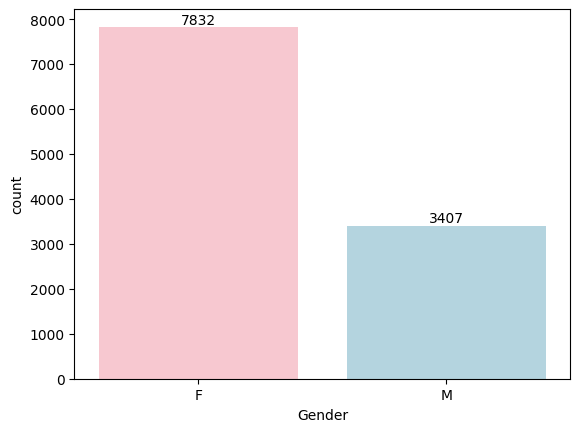

In [72]:
colors = {'F': 'pink', 'M': 'lightblue'}
gshop = sns.countplot(x = 'Gender', data = df, palette=colors.values())

for bars in gshop.containers:
    gshop.bar_label(bars)

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\2800678100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette=colors.values())


<Axes: xlabel='Gender', ylabel='Amount'>

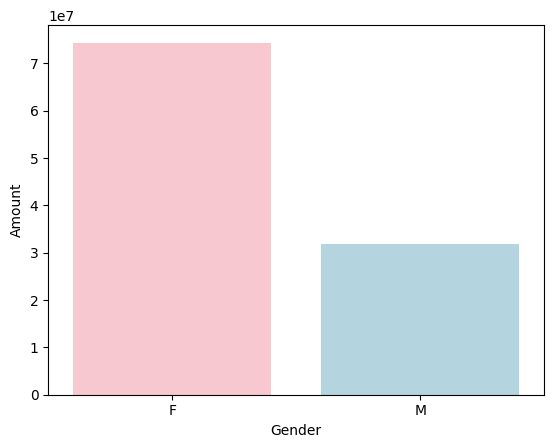

In [73]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette=colors.values())

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### AGE

In [74]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

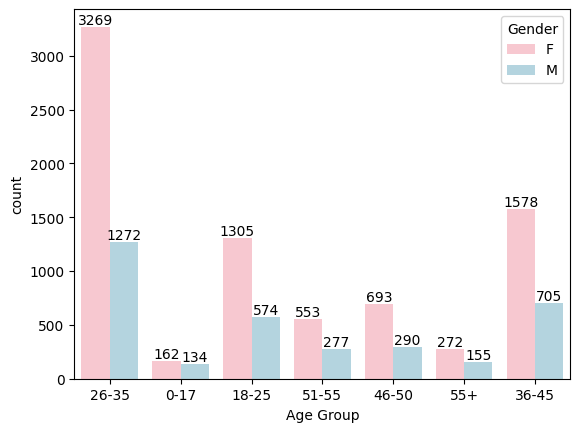

In [75]:
#total sales on basis of age and gender
g_age_sales = sns.countplot (data = df, x = 'Age Group', hue = 'Gender', palette=colors.values())

for bars in g_age_sales.containers:
    g_age_sales.bar_label(bars)

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\1355468375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette ='coolwarm')


<Axes: xlabel='Age Group', ylabel='Amount'>

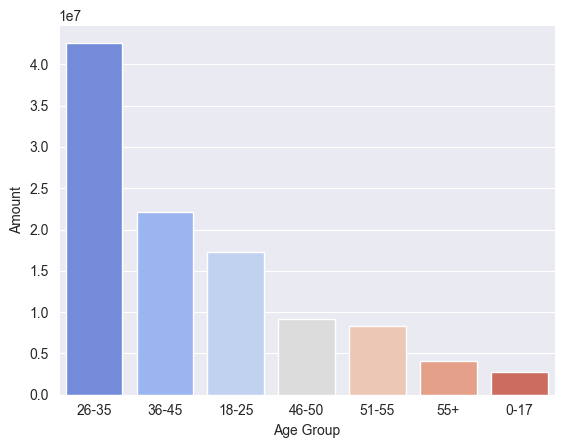

In [87]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette ='coolwarm')


*From above graphs we can see that most of the buyers are of the age group between 26-35 yrs and are female*

### STATE

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\4212024145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette ='rocket')


<Axes: xlabel='State', ylabel='Orders'>

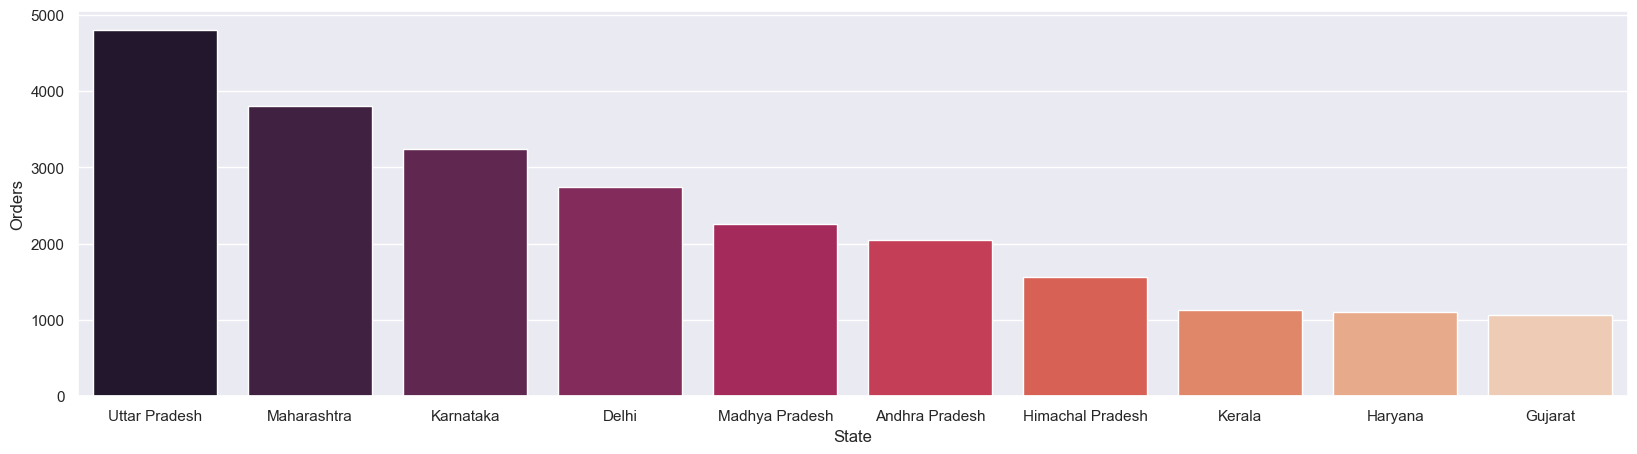

In [125]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette ='rocket')

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\750249557.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette ='rocket')


<Axes: xlabel='State', ylabel='Amount'>

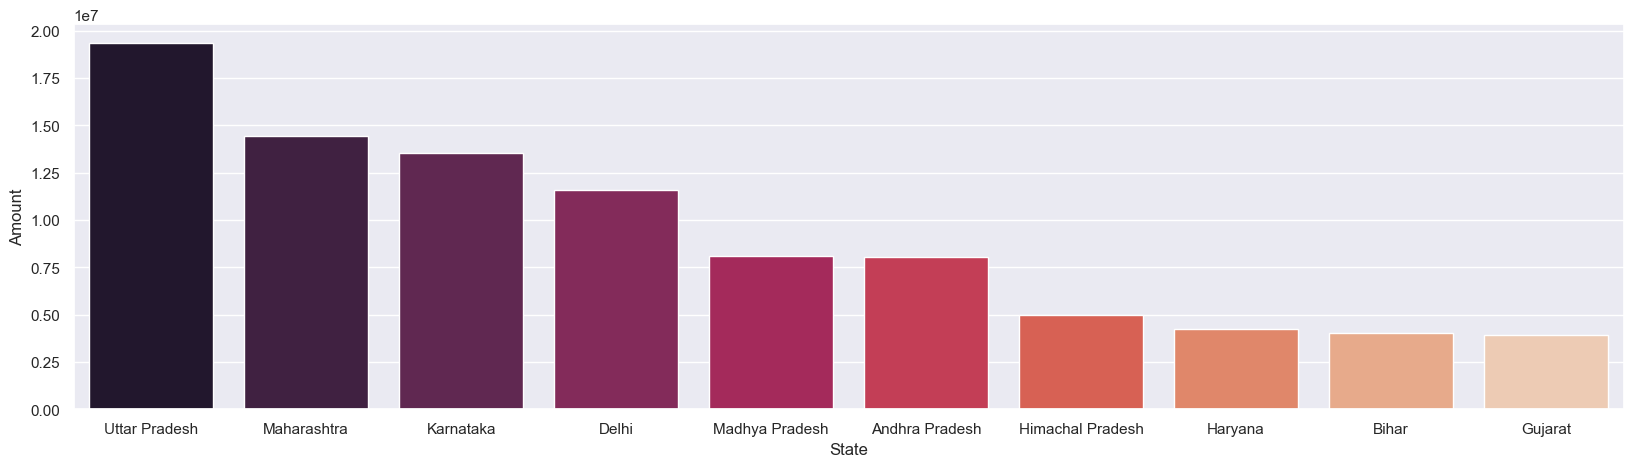

In [124]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette ='rocket')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### MARITAL STATUS

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\2981594205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Marital_Status', palette=colors.values())


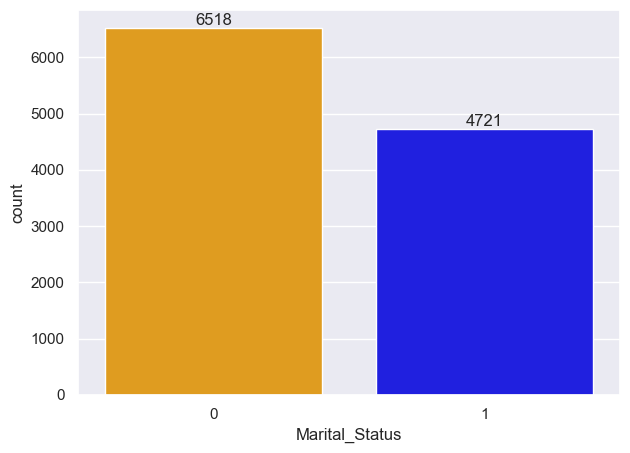

In [108]:
colors = {'0': 'orange', '1': 'blue'}
ax = sns.countplot(data = df, x = 'Marital_Status', palette=colors.values())

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

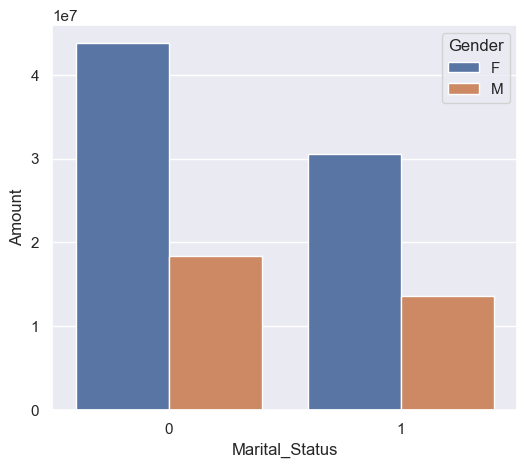

In [112]:
sales_mgen = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\1215614287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation', palette ='pastel')


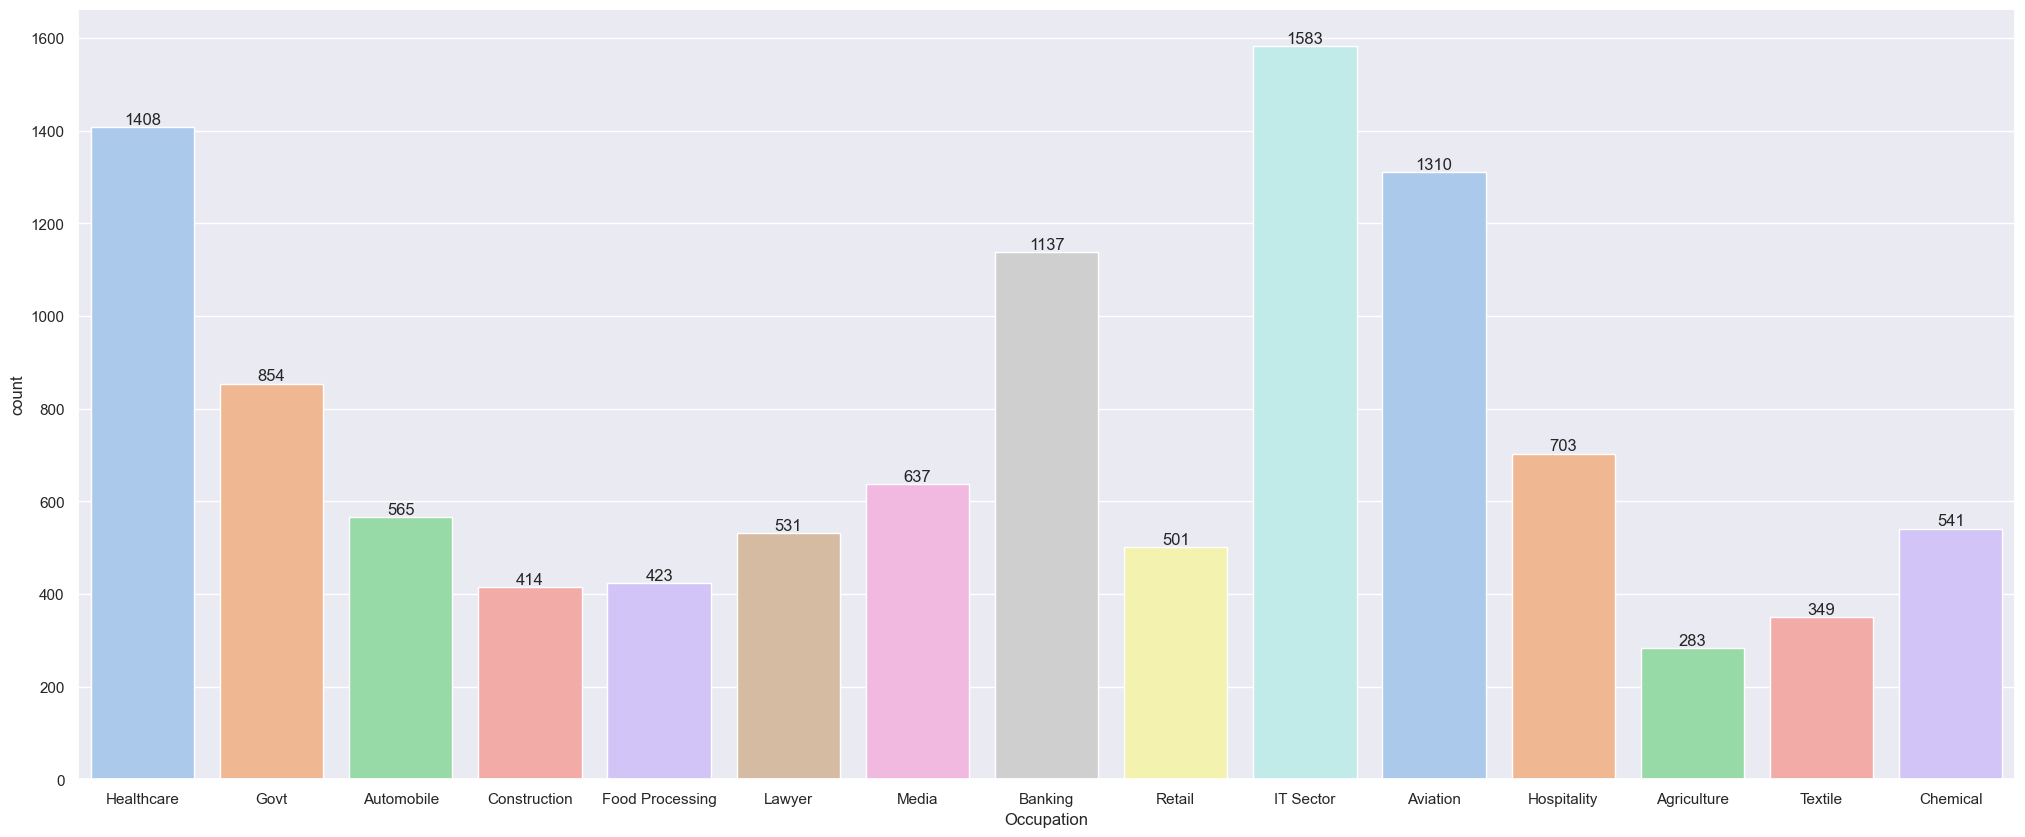

In [119]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.countplot(data = df, x = 'Occupation', palette ='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\94894242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', palette = 'husl')


<Axes: xlabel='Occupation', ylabel='Amount'>

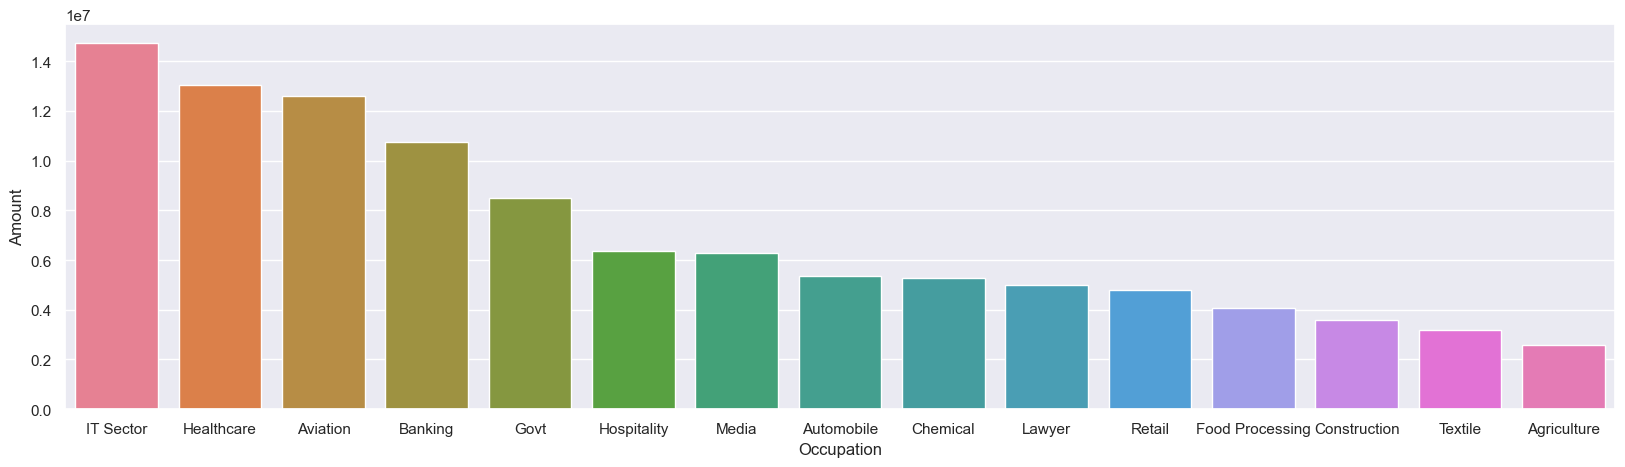

In [123]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', palette = 'husl')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\1104308538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category', palette = 'husl')


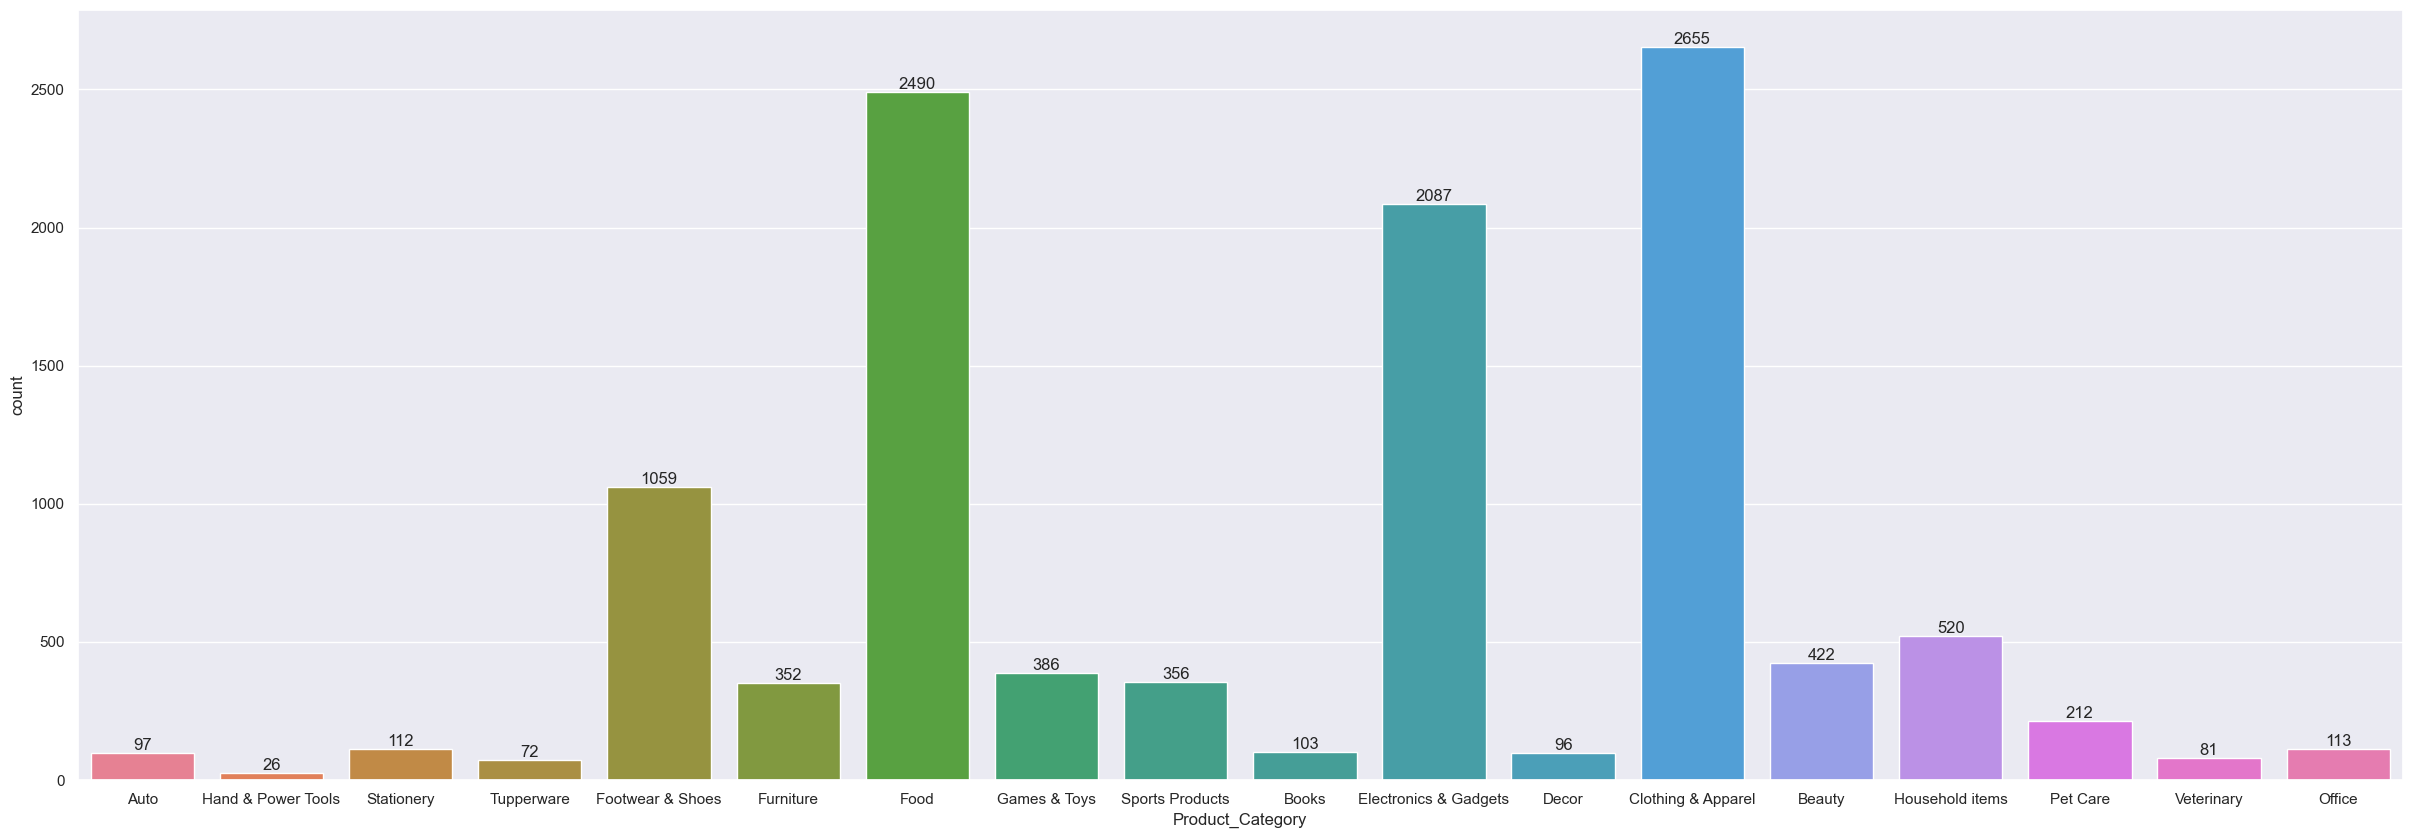

In [136]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(data = df, x = 'Product_Category', palette = 'husl')

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\Trisha Jain\AppData\Local\Temp\ipykernel_7844\3372961838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = 'husl')


<Axes: xlabel='Product_Category', ylabel='Amount'>

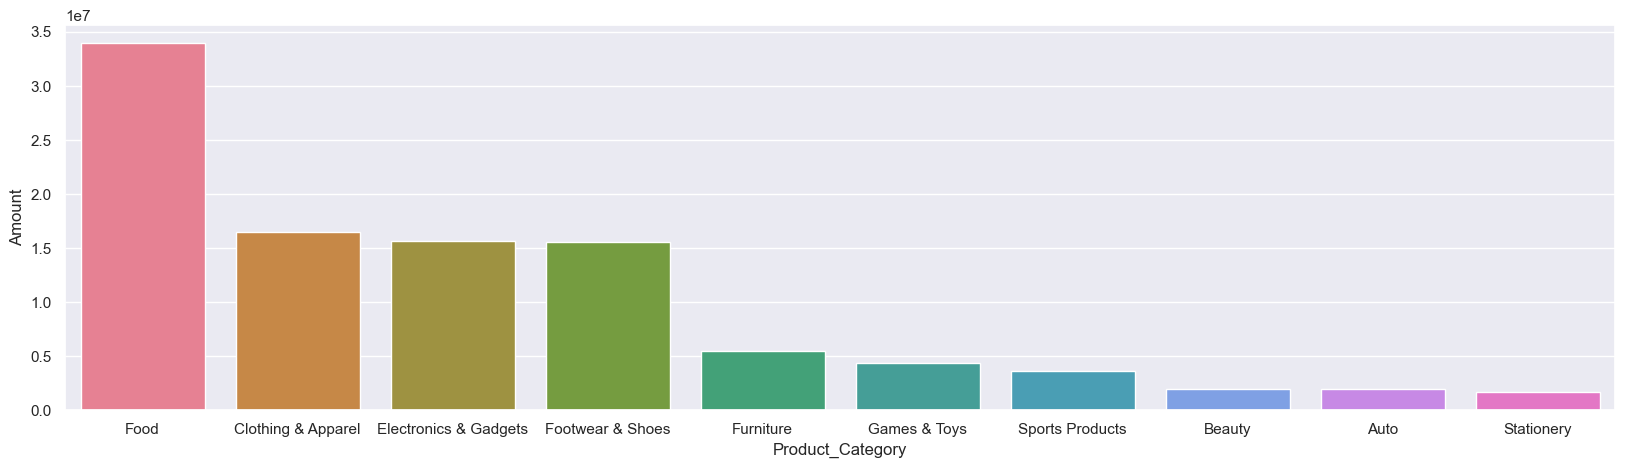

In [132]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = 'husl')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

### Product ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

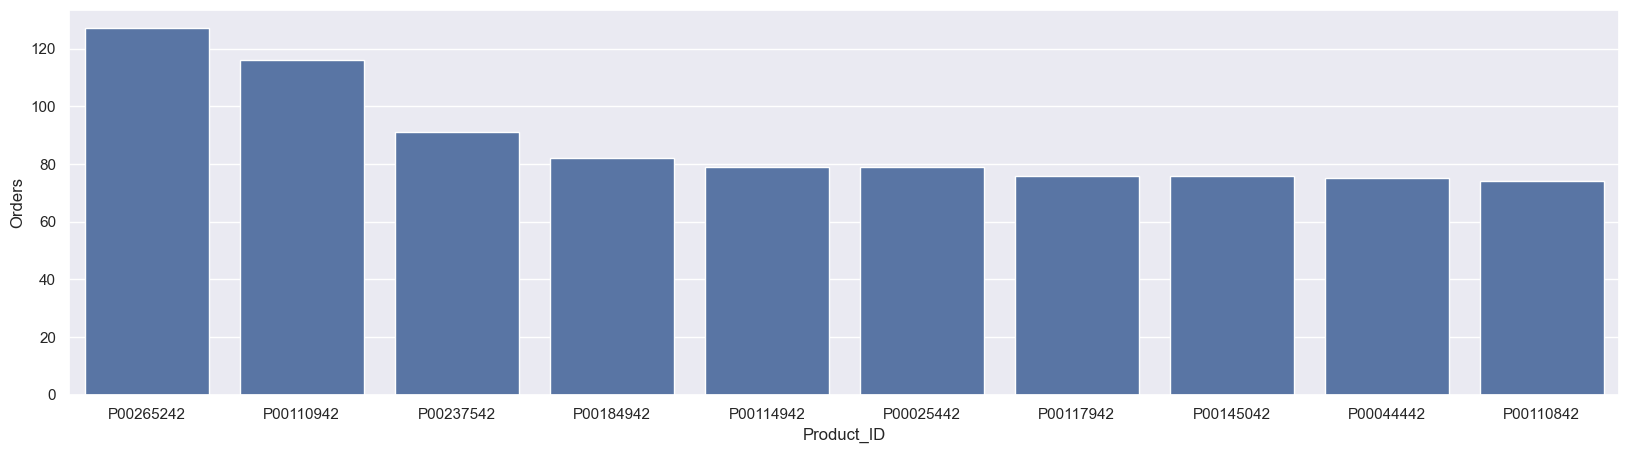

In [133]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', )

<Axes: xlabel='Product_ID'>

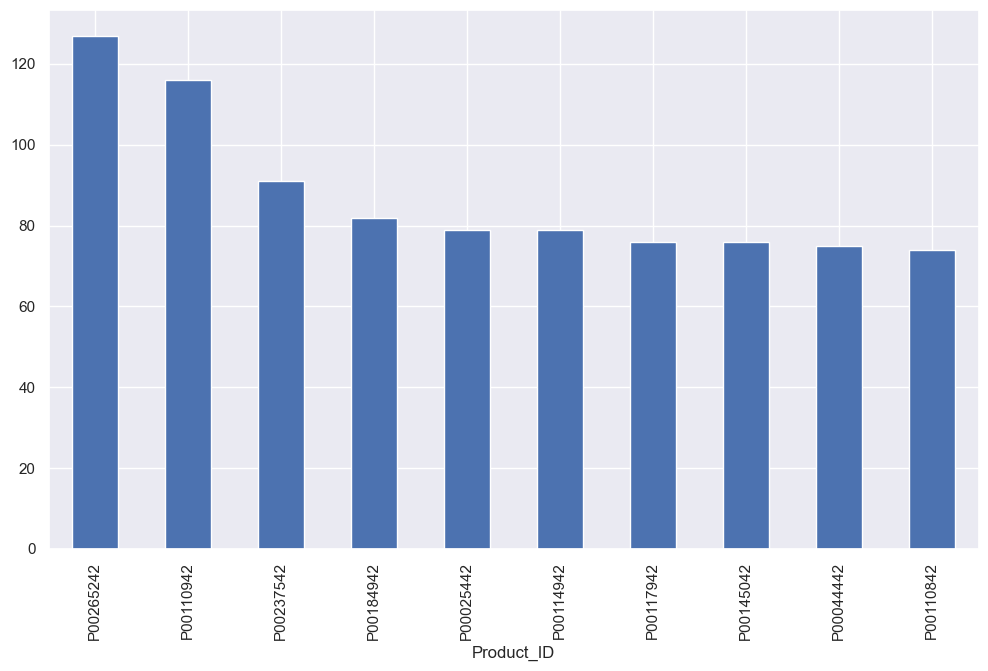

In [137]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*